# CITS4419 Project - Measuring Wi-Fi Signals to Determine RSSI
### Roarke Holland 21742366 | Thi Phuong Thao Le 22755019
### This notebook aims to provide analysis of the measured data taken on the UWA campus. Data is read in from csv files and then graphically displayed and statistically analysed.

In [42]:
#import sys
#!{sys.executable} -m pip install folium

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import base64

In [44]:
index_csv_1 = 'data_2_9' # First day readings
index_csv_2 = 'data_9_9' # Second day readings

### Read in the csv files into dataframes

In [45]:
def read_csv_data(index_csv,location,dropped=True):
    csv_read = pd.read_csv(index_csv+'/'+location+'.csv').dropna()
    if(dropped): # If dropped=True all SSIDs are dropped except eduroam, unifi and UnifiGuest
        df_new = csv_read.drop(csv_read[~((csv_read['SSID'] == 'eduroam') | (csv_read['SSID'] == 'Unifi') | (csv_read['SSID'] == 'UnifiGuest'))].index)
        df_new = df_new.drop(df_new[((df_new['RSSI'] == 0))].index)
        #print('Dropped '+ str(len(csv_read)-len(df_new))+' connections')
    else:
        df_new = csv_read
    df_new = df_new.sort_values('RSSI',ascending=False)
    return df_new

### Graphing RSSI max to min

In [46]:
def plot_df_line(dataframe,day,loc):
    data = {'Index':[x for x in range(0,len(dataframe))],
            'RSSI': dataframe['RSSI']}
    df_new = pd.DataFrame(data,columns=['Index','RSSI'])
    print('- Mean RSSI: '+str(df_new['RSSI'].mean()))
    print('- Max  RSSI: '+str(df_new['RSSI'].max()))
    print('- Min  RSSI: '+str(df_new['RSSI'].min())+'\n')
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))   
    df_new.plot(ax=axes,x='Index',y='RSSI',kind='line') 
    plt.savefig(str(day)+"_"+str(loc)+".jpg")
    plt.show()

In [47]:
def plot_df_lines(csv,day):
    for ii in range(1,14):
        print('Location '+str(ii))
        df_1 = read_csv_data(csv,str(ii))
        plot_df_line(df_1,day,ii)
       

### Plot single location

- Mean RSSI: -88.13915094339623
- Max  RSSI: -69.0
- Min  RSSI: -95.0



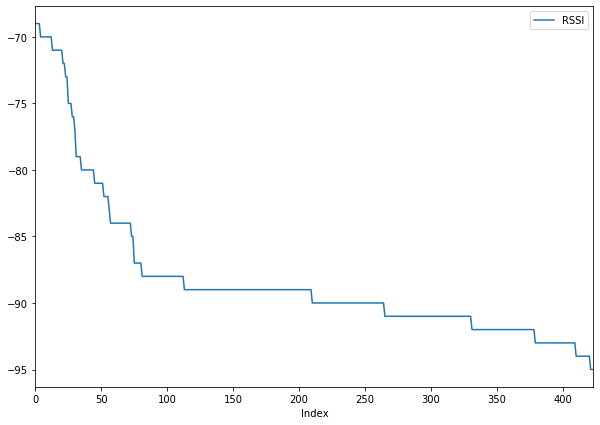

In [48]:
df_1 = read_csv_data(index_csv_1,'1',dropped=False)
plot_df_line(df_1,1,1)

### Plot all locations

Location 1
- Mean RSSI: -87.95189873417722
- Max  RSSI: -69.0
- Min  RSSI: -94.0



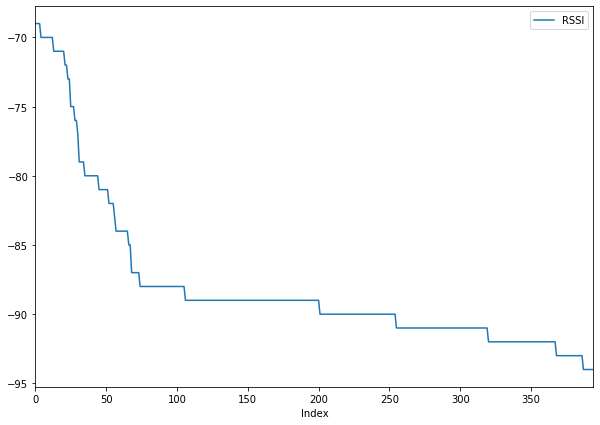

Location 2
- Mean RSSI: -87.74333333333334
- Max  RSSI: -76.0
- Min  RSSI: -94.0



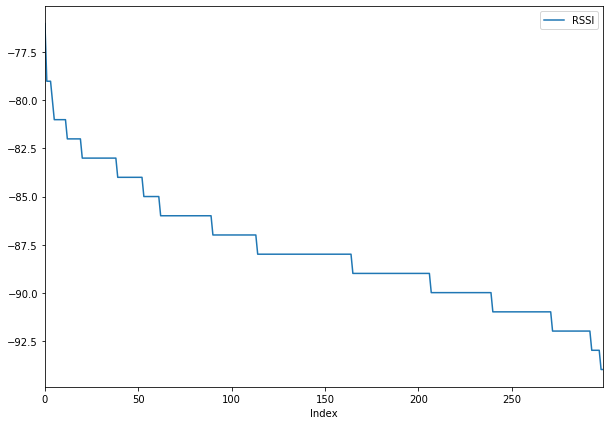

Location 3
- Mean RSSI: -84.41278065630397
- Max  RSSI: -58.0
- Min  RSSI: -96.0



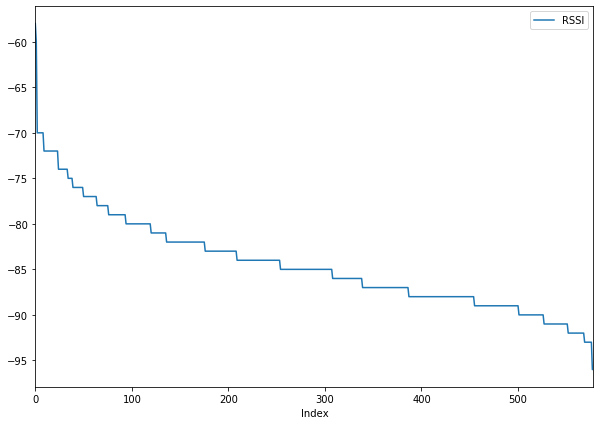

Location 4
- Mean RSSI: -77.99159663865547
- Max  RSSI: -64.0
- Min  RSSI: -92.0



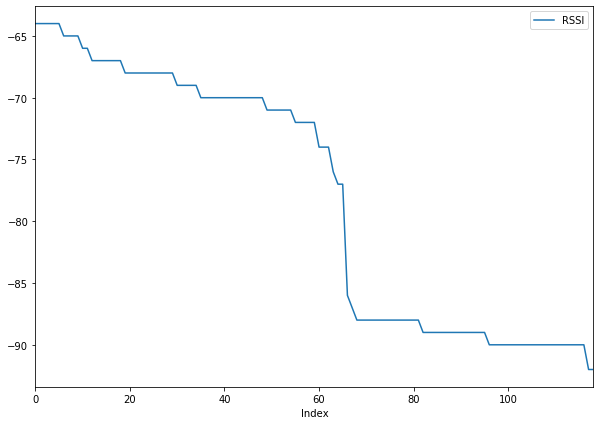

Location 5
- Mean RSSI: -80.65432098765432
- Max  RSSI: -63.0
- Min  RSSI: -93.0



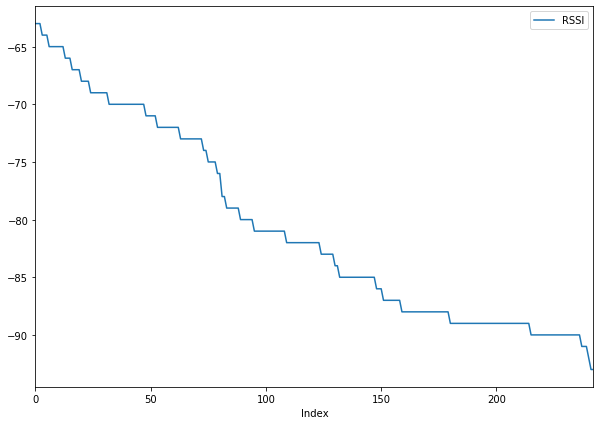

Location 6
- Mean RSSI: -84.81818181818181
- Max  RSSI: -76.0
- Min  RSSI: -91.0



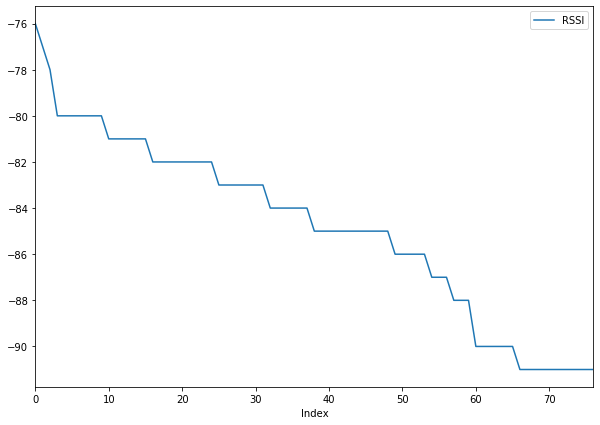

Location 7
- Mean RSSI: -84.34453781512605
- Max  RSSI: -69.0
- Min  RSSI: -93.0



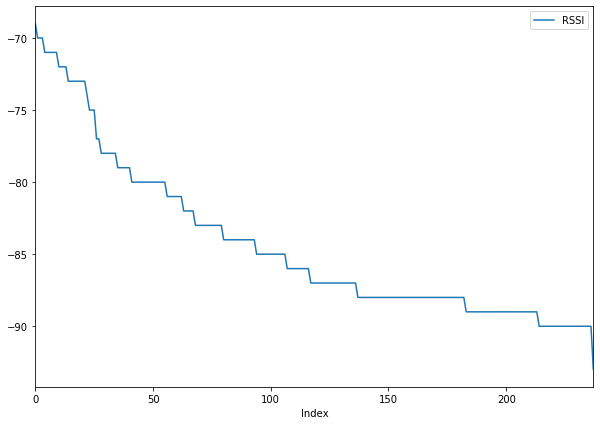

Location 8
- Mean RSSI: -81.84615384615384
- Max  RSSI: -66.0
- Min  RSSI: -90.0



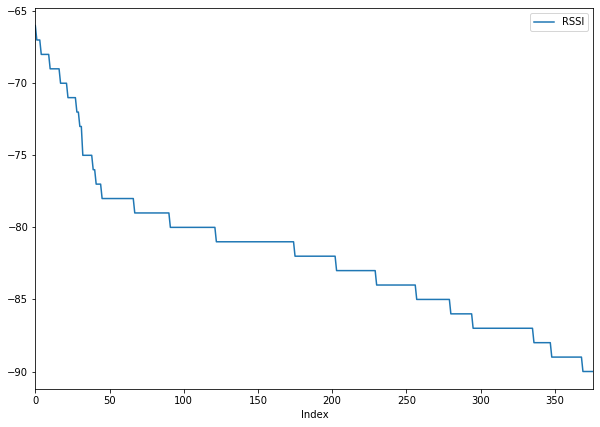

Location 9
- Mean RSSI: -86.08901515151516
- Max  RSSI: -76.0
- Min  RSSI: -92.0



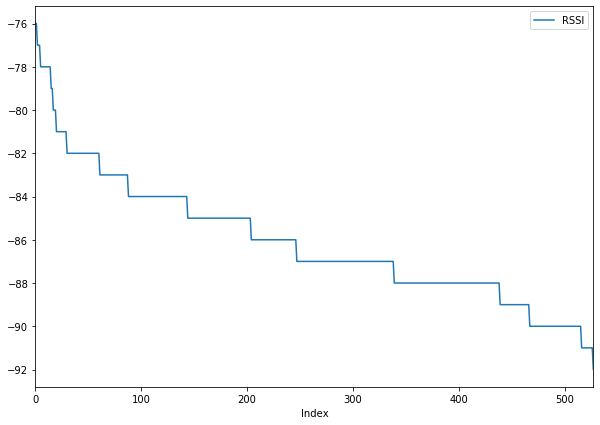

Location 10
- Mean RSSI: -82.20293398533008
- Max  RSSI: -70.0
- Min  RSSI: -90.0



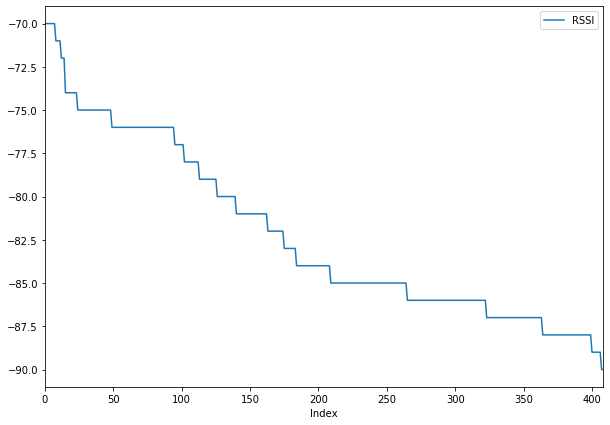

Location 11
- Mean RSSI: -81.14734299516908
- Max  RSSI: -69.0
- Min  RSSI: -92.0



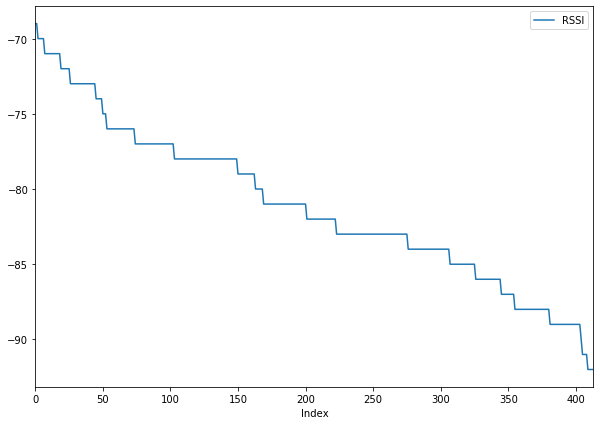

Location 12
- Mean RSSI: -81.16988416988417
- Max  RSSI: -68.0
- Min  RSSI: -89.0



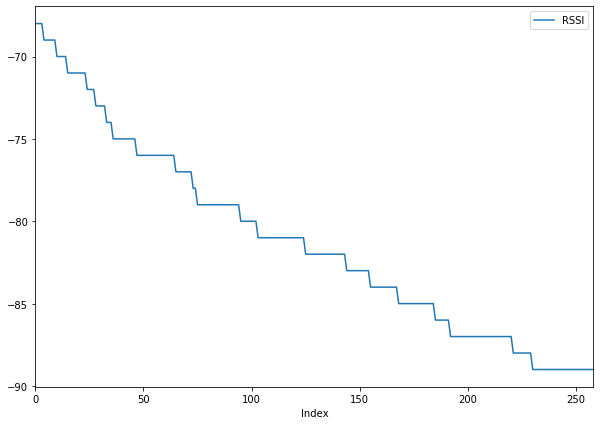

Location 13
- Mean RSSI: -84.83870967741936
- Max  RSSI: -77.0
- Min  RSSI: -92.0



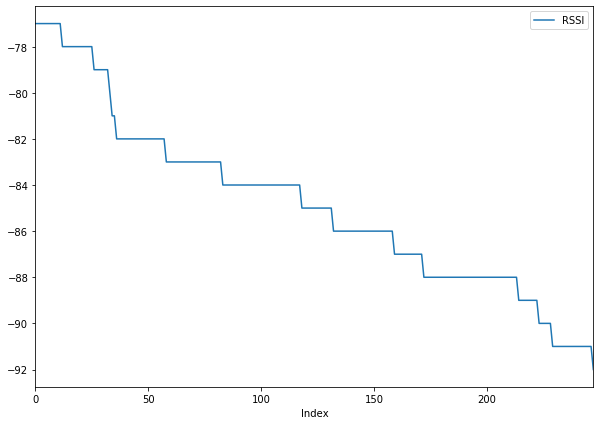

In [49]:
plot_df_lines(index_csv_1,1) # Day 1

Location 1
- Mean RSSI: -84.79518072289157
- Max  RSSI: -65.0
- Min  RSSI: -94.0



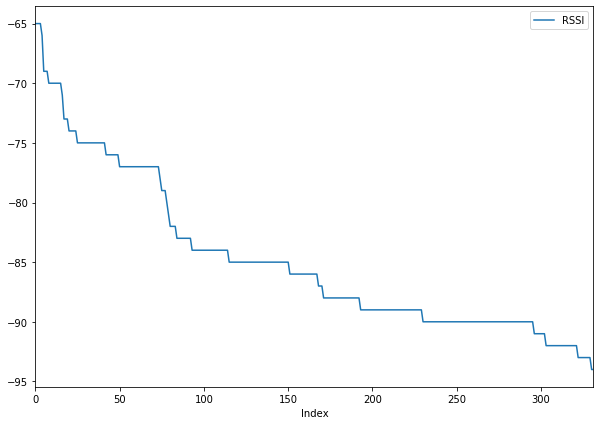

Location 2
- Mean RSSI: -87.73157894736842
- Max  RSSI: -80.0
- Min  RSSI: -93.0



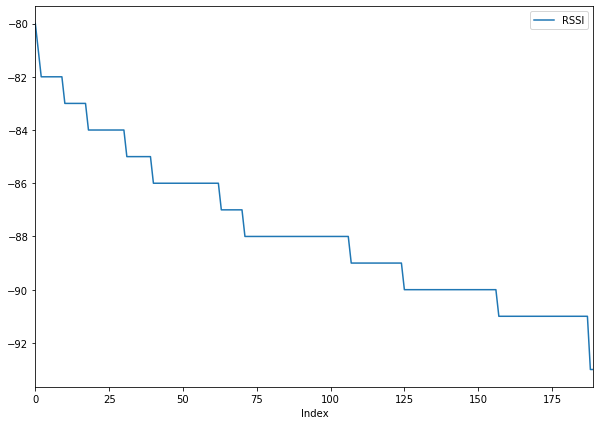

Location 3
- Mean RSSI: -84.79919678714859
- Max  RSSI: -67.0
- Min  RSSI: -93.0



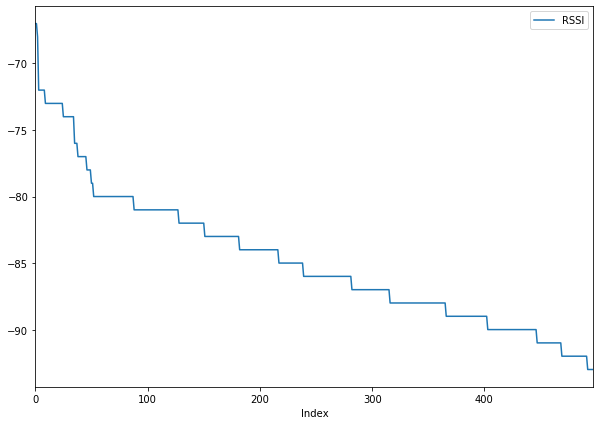

Location 4
- Mean RSSI: -80.30232558139535
- Max  RSSI: -64.0
- Min  RSSI: -91.0



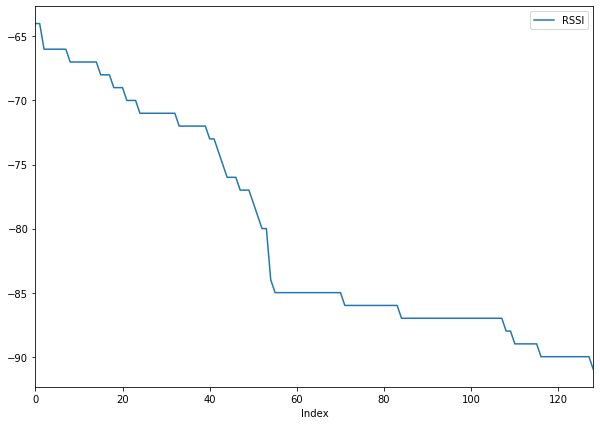

Location 5
- Mean RSSI: -80.3921568627451
- Max  RSSI: -58.0
- Min  RSSI: -93.0



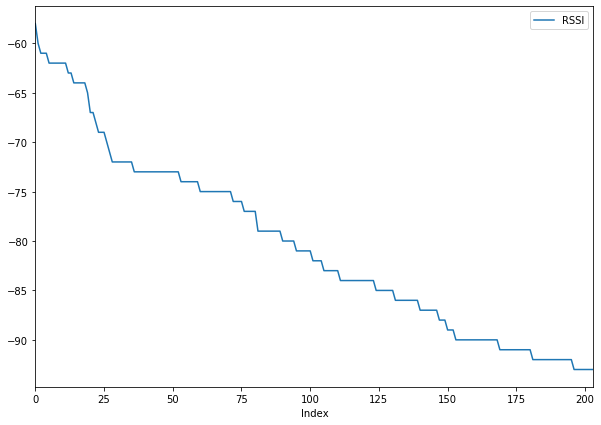

Location 6
- Mean RSSI: -84.66666666666667
- Max  RSSI: -78.0
- Min  RSSI: -90.0



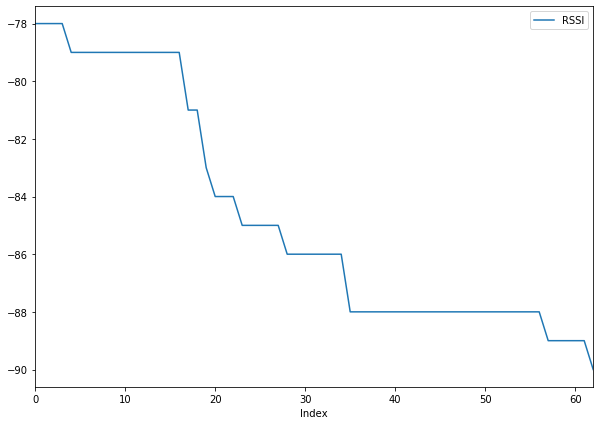

Location 7
- Mean RSSI: -86.5964125560538
- Max  RSSI: -79.0
- Min  RSSI: -95.0



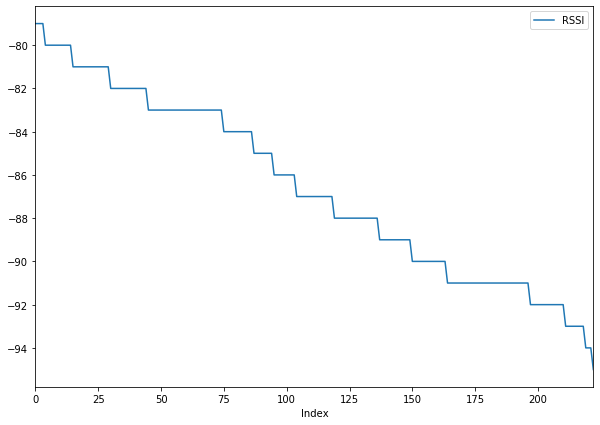

Location 8
- Mean RSSI: -83.48412698412699
- Max  RSSI: -60.0
- Min  RSSI: -91.0



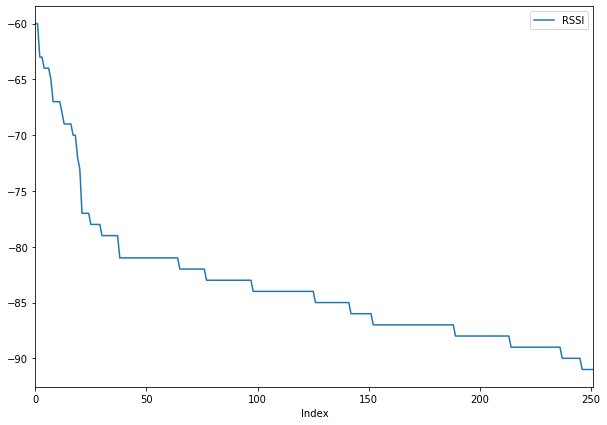

Location 9
- Mean RSSI: -85.784
- Max  RSSI: -75.0
- Min  RSSI: -91.0



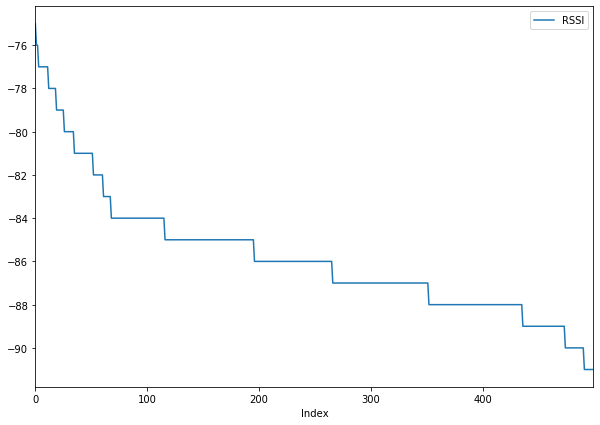

Location 10
- Mean RSSI: -82.045
- Max  RSSI: -68.0
- Min  RSSI: -89.0



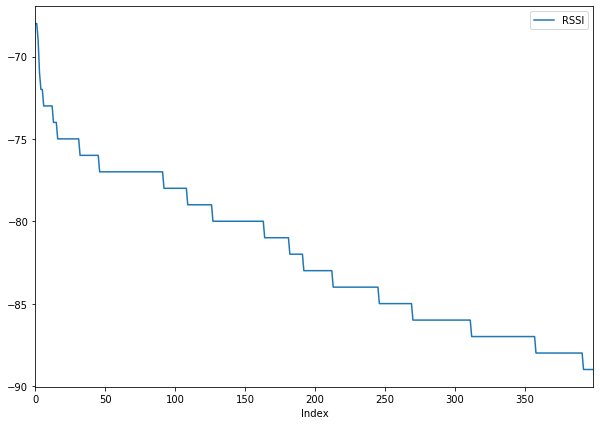

Location 11
- Mean RSSI: -80.75700934579439
- Max  RSSI: -70.0
- Min  RSSI: -91.0



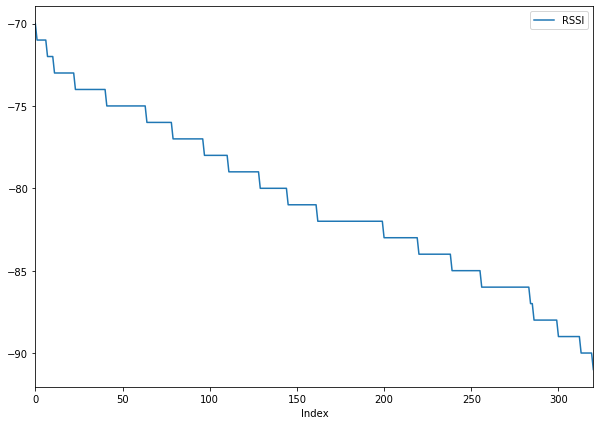

Location 12
- Mean RSSI: -82.472049689441
- Max  RSSI: -71.0
- Min  RSSI: -92.0



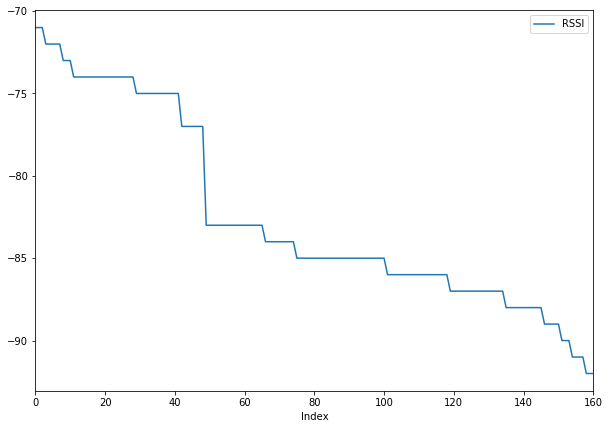

Location 13
- Mean RSSI: -86.02463054187191
- Max  RSSI: -80.0
- Min  RSSI: -91.0



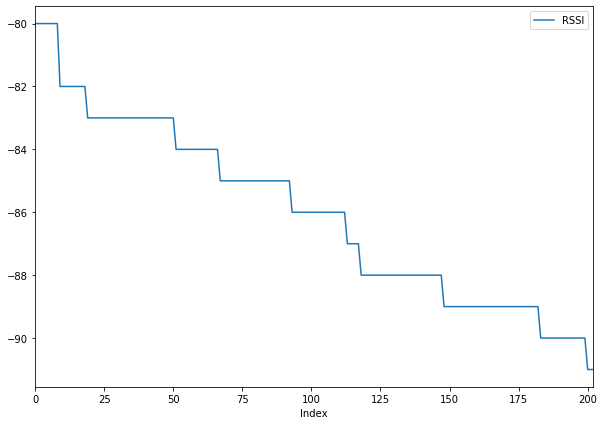

In [50]:
plot_df_lines(index_csv_2,2) # Day 2

### Total measurements taken 

In [51]:
def count_total_measurements(csv,isDropped):
    len_df = 0
    for ii in range(1,14):
        df_1 = read_csv_data(csv,str(ii),dropped=isDropped)
        len_df += len(df_1)
    print("Total measurements: "+str(len_df))

In [52]:
count_total_measurements(index_csv_1,False) # Without dropping data
count_total_measurements(index_csv_1,True) # With dropping data

Total measurements: 4882
Total measurements: 4186


In [53]:
count_total_measurements(index_csv_2,False) # Without dropping data
count_total_measurements(index_csv_2,True) # With dropping data

Total measurements: 4027
Total measurements: 3476


### Channels statistics


In [54]:
def count_unique(csv,day):
    for ii in range(1,14):
        df_1 = read_csv_data(csv,str(ii),dropped=True)
        channels_count = df_1.groupby('Channel')['SSID'].count()
        print('Unique channels at location ' +str(ii)+ ': '+str(len(df_1['Channel'].drop_duplicates().unique()))+'\n')      
        fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))   
        channels_count.plot(ax=axes,x='Index',y='RSSI',kind='barh')
        plt.savefig("channels"+str(day)+"_"+str(ii)+".jpg")
        plt.show()

Unique channels at location 1: 11



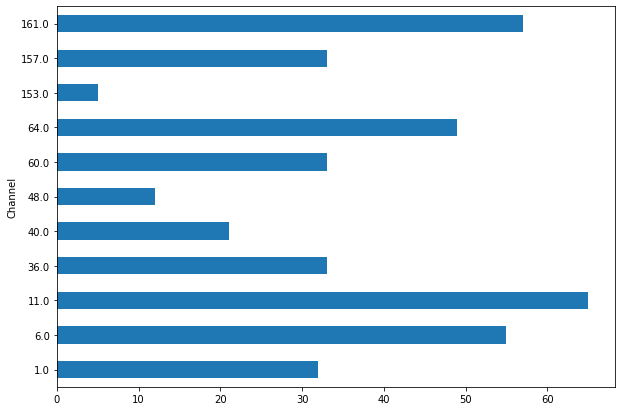

Unique channels at location 2: 7



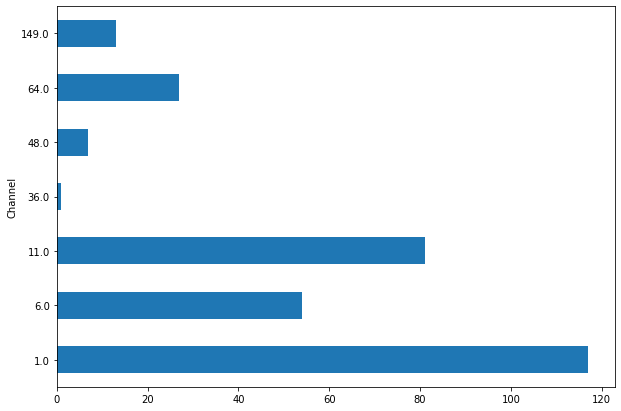

Unique channels at location 3: 11



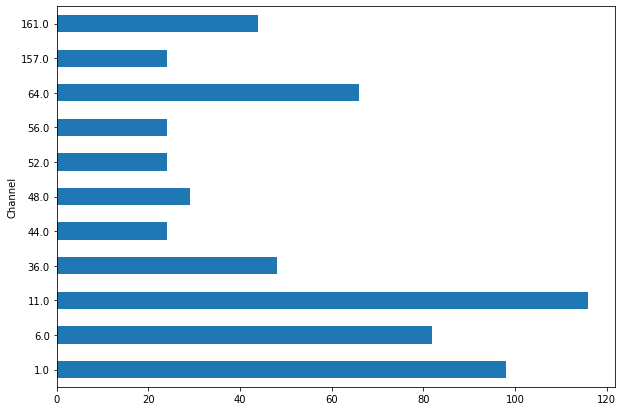

Unique channels at location 4: 4



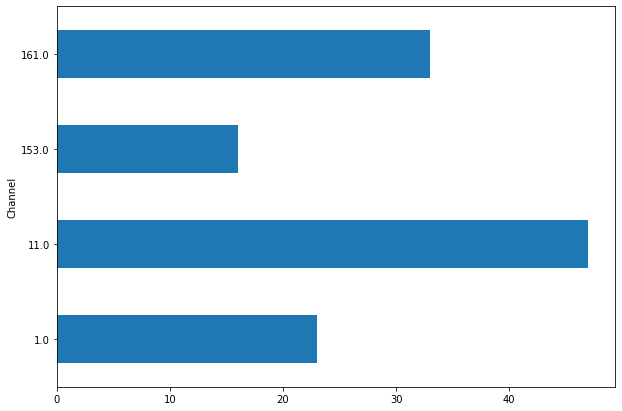

Unique channels at location 5: 5



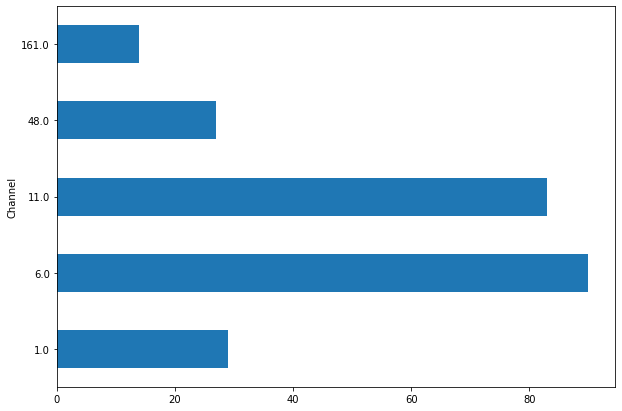

Unique channels at location 6: 3



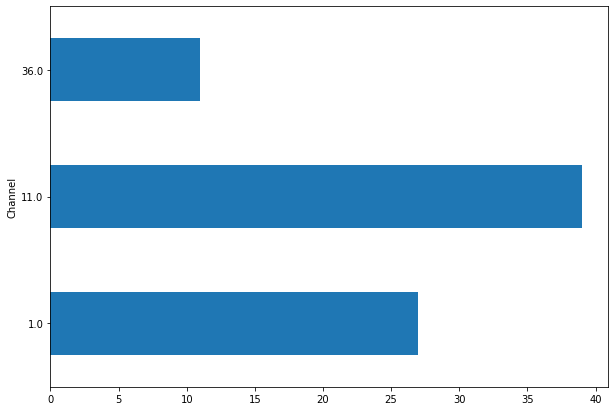

Unique channels at location 7: 6



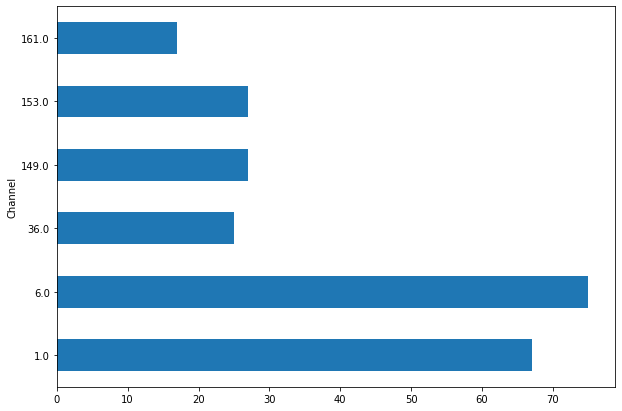

Unique channels at location 8: 7



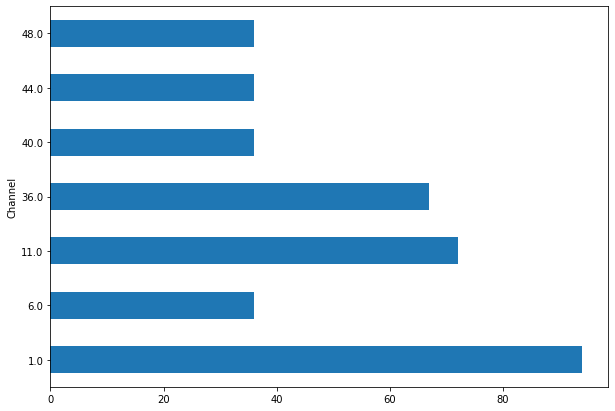

Unique channels at location 9: 11



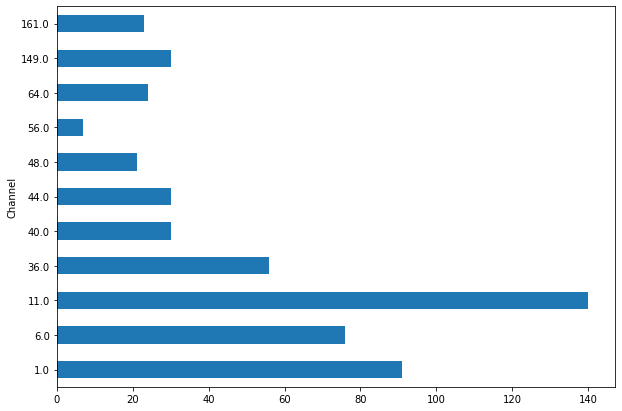

Unique channels at location 10: 6



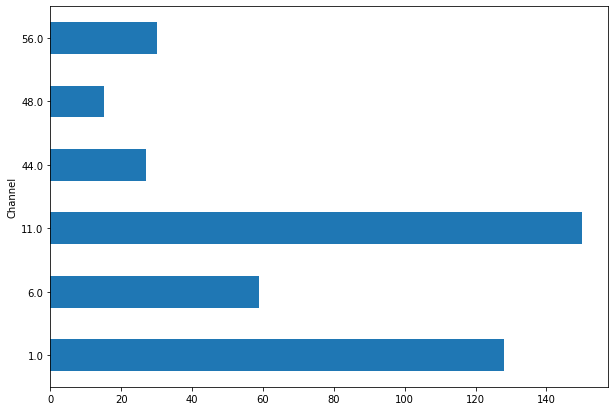

Unique channels at location 11: 11



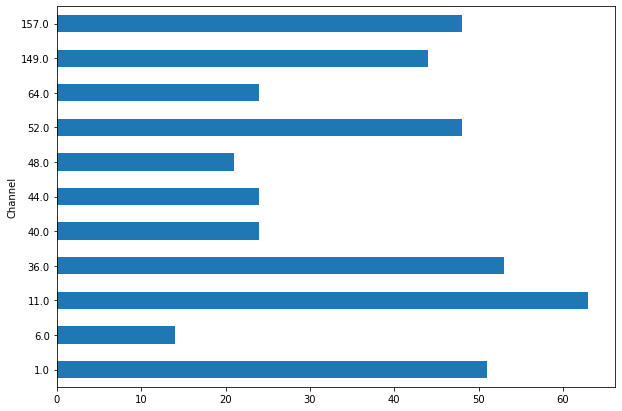

Unique channels at location 12: 7



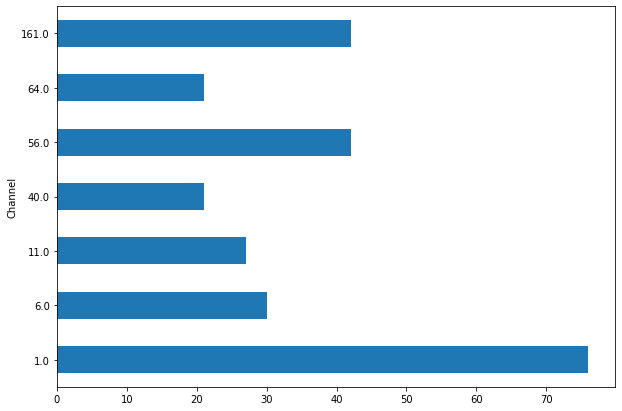

Unique channels at location 13: 9



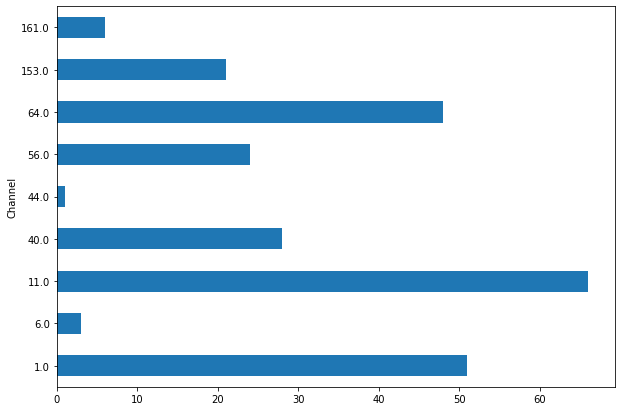

In [55]:
count_unique(index_csv_1,1)

Unique channels at location 1: 7



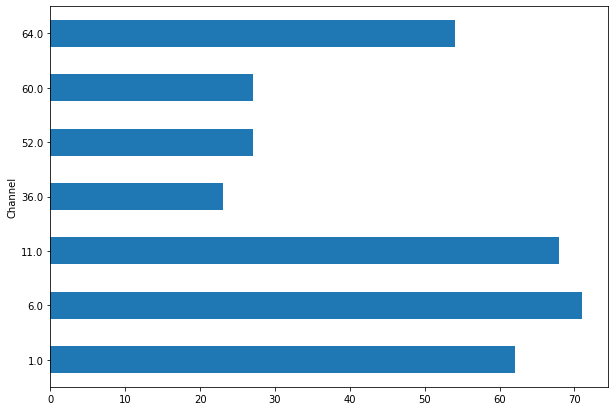

Unique channels at location 2: 5



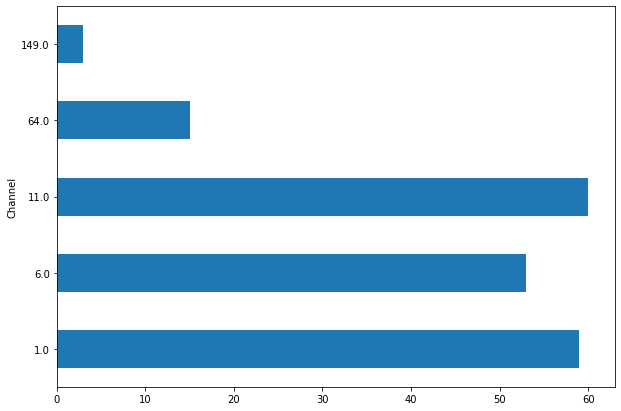

Unique channels at location 3: 11



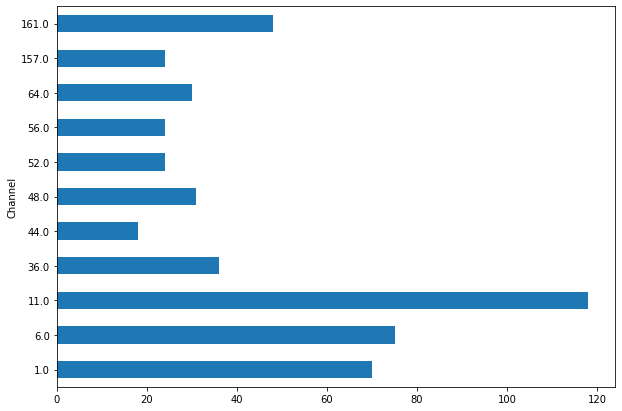

Unique channels at location 4: 5



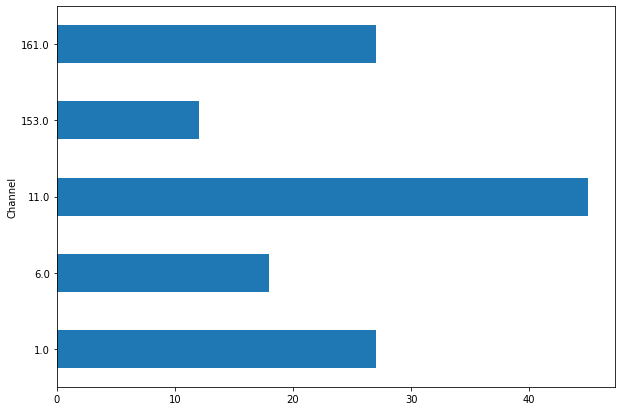

Unique channels at location 5: 6



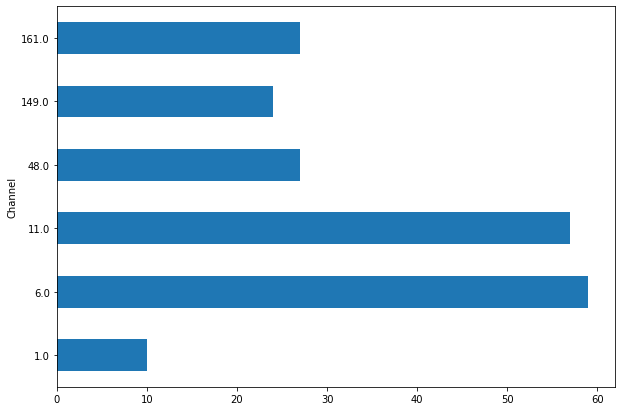

Unique channels at location 6: 2



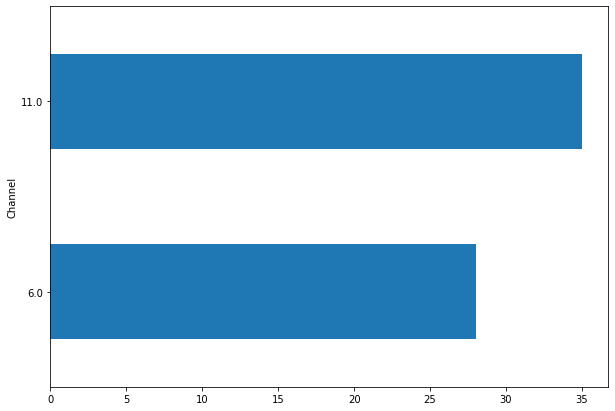

Unique channels at location 7: 6



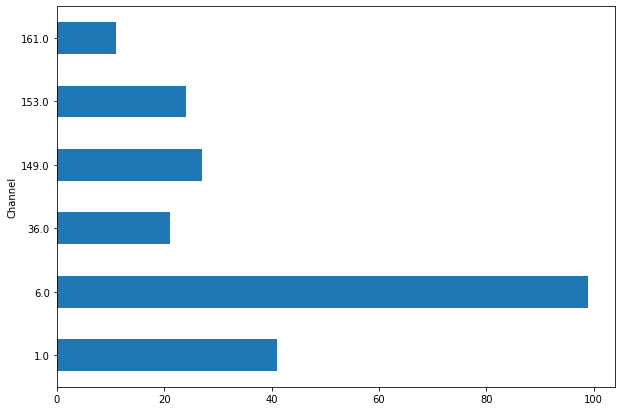

Unique channels at location 8: 7



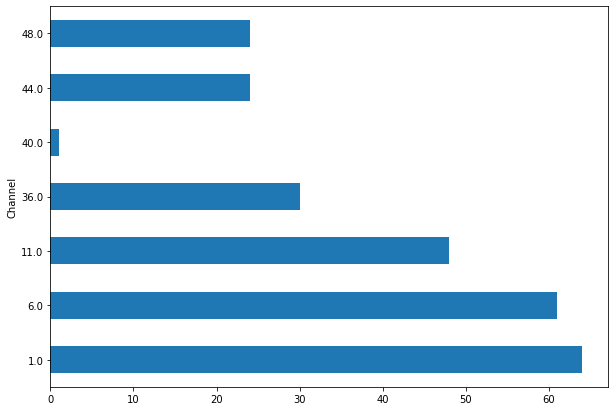

Unique channels at location 9: 9



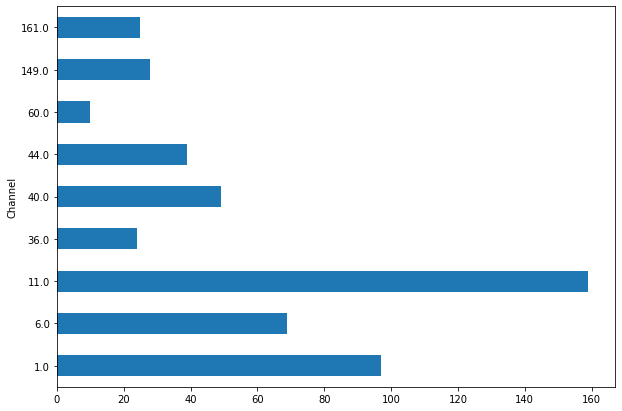

Unique channels at location 10: 8



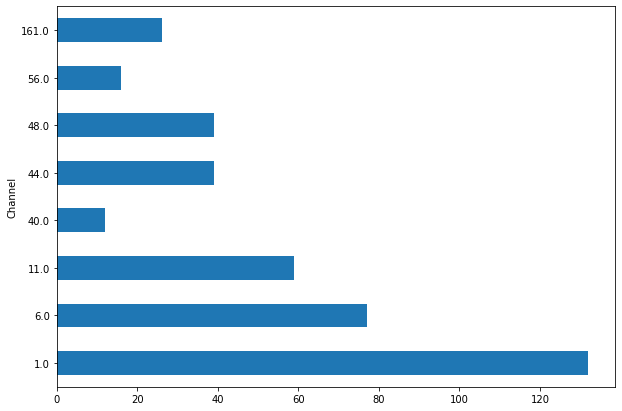

Unique channels at location 11: 10



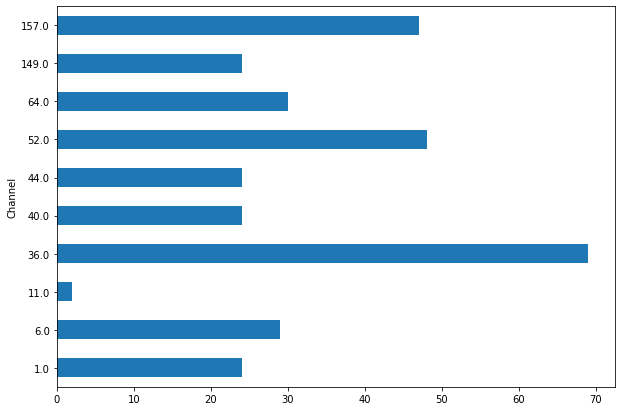

Unique channels at location 12: 5



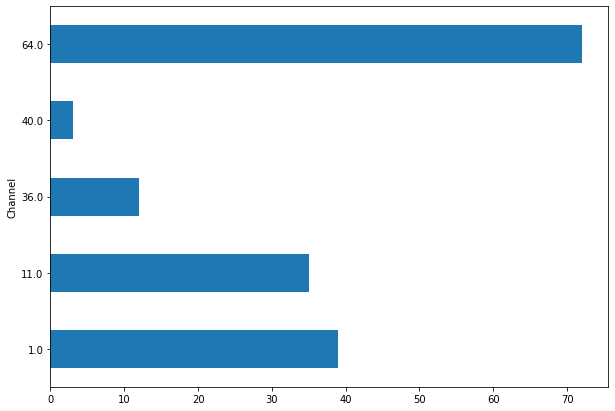

Unique channels at location 13: 8



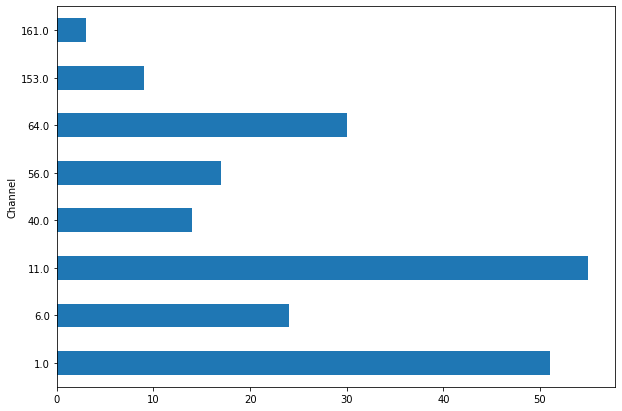

In [56]:
count_unique(index_csv_2,2)

### Mapping

In [57]:
from folium.features import DivIcon

data = pd.DataFrame({
    'lon':[-31.9763466, -31.9764012, -31.976037, -31.9773932, -31.9970655, -31.9764831, -31.9773932, -31.976954, -31.9783078,-31.9791177,-31.9796774,-31.9788083,-31.9785763],
    'lat':[115.8200973, 115.8183646, 115.820238, 115.8190727, 115.8176136, 115.8168197, 115.8168840, 115.816308,115.8169001, 115.8168519, 115.8159399, 115.8181500, 115.8192015]
    })
data

# Make an empty map
m = folium.Map(location = [-31.980018, 115.818027], zoom_start = 15) 
 
# I can add marker one by one on the map
for i in range(0,len(data)):
    encoded_1 = base64.b64encode(open("1_"+str(i+1)+".jpg", 'rb').read()).decode()
    encoded_2 = base64.b64encode(open("2_"+str(i+1)+".jpg", 'rb').read()).decode()
    encoded_3 = base64.b64encode(open("channels1_"+str(i+1)+".jpg", 'rb').read()).decode()
    encoded_4 = base64.b64encode(open("channels2_"+str(i+1)+".jpg", 'rb').read()).decode()
    html ='<b>Day 1</b><p><img src="data:image/jpeg;base64,{}" style="width:250px;height:250px;"><img src="data:image/jpeg;base64,{}" style="width:250px;height:250px;"></p><b>Day 2</b><p><img src="data:image/jpeg;base64,{}" style="width:250px;height:250px;"><img src="data:image/jpeg;base64,{}" style="width:250px;height:250px;"></p>'.format

    iframe = folium.IFrame(html(encoded_1,encoded_3,encoded_2,encoded_4), width=300+20, height=400+20)
    popup = folium.Popup(iframe, max_width=2650)

    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=popup,  icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html='<div style="font-size: 18pt; color : black">'+str(i+1)+'</div>',
        )).add_to(m)
 
# Save it as html
m.save('mapping.html')


### RSSI Analysis

In [58]:
def mean_max_min(df,ii):
    data = {'Location':ii, 'Mean': df['RSSI'].mean(),'Max':df['RSSI'].max(),
            'Min':df['RSSI'].min(),'Spread':df['RSSI'].min()-df['RSSI'].max()}
    df_new = pd.DataFrame(data,columns=['Location','Mean','Max','Min','Spread'],index=[0])
    return df_new

In [59]:
def format_rssi_df(csv):
    for ii in range(1,14):
        df_1 = read_csv_data(csv,str(ii),dropped=True)
        if (ii == 1):
            df_concat = mean_max_min(df_1,ii)
        else:
            df = mean_max_min(df_1,ii)
            df_concat = pd.concat([df_concat,df])
    df_concat = df_concat.set_index('Location') # use location as index
    return df_concat

In [60]:
rssi_table_1 = format_rssi_df(index_csv_1) # Table 1
rssi_table_2 = format_rssi_df(index_csv_2) # Table 2
df_concat = pd.concat([rssi_table_1,rssi_table_2],axis=1,keys=['Day 1','Day 2']) # Join both tables

In [61]:
df_concat # Output tables

Day 1                         Day 2                   
               Mean   Max   Min Spread       Mean   Max   Min Spread
Location                                                            
1        -87.951899 -69.0 -94.0  -25.0 -84.795181 -65.0 -94.0  -29.0
2        -87.743333 -76.0 -94.0  -18.0 -87.731579 -80.0 -93.0  -13.0
3        -84.412781 -58.0 -96.0  -38.0 -84.799197 -67.0 -93.0  -26.0
4        -77.991597 -64.0 -92.0  -28.0 -80.302326 -64.0 -91.0  -27.0
5        -80.654321 -63.0 -93.0  -30.0 -80.392157 -58.0 -93.0  -35.0
6        -84.818182 -76.0 -91.0  -15.0 -84.666667 -78.0 -90.0  -12.0
7        -84.344538 -69.0 -93.0  -24.0 -86.596413 -79.0 -95.0  -16.0
8        -81.846154 -66.0 -90.0  -24.0 -83.484127 -60.0 -91.0  -31.0
9        -86.089015 -76.0 -92.0  -16.0 -85.784000 -75.0 -91.0  -16.0
10       -82.202934 -70.0 -90.0  -20.0 -82.045000 -68.0 -89.0  -21.0
11       -81.147343 -69.0 -92.0  -23.0 -80.757009 -70.0 -91.0  -21.0
12       -81.169884 -68.0 -89.0  -21.0 -82.472050 -71.0 -92.0  -21.0
13       -84.838710 -77.0 -92.0  -15.0 -86.024631 -80.0 -91.0  -11.0

#### From the table of RSSI data (based on Max RSSI) it is apparent that the following locations require additional Wi-Fi infrastructure:
- Day 1: Locations 2, 6, 9, 10 and 13
- Day 2: Locations 2, 6, 7, 9, 11, 12 and 13

###### Due to the overlap of Locations 2, 6, 9 and 13, it is recommended that they are improved first.

The spread shows the difference between the max RSSI and min RSSI values of the given location. A larger spread may indicate that there are many Wi-Fi devices that are being picked up by the application or it may indicate the signals are temperamental and fluctuate. 